In [14]:
import numpy as np
import matplotlib.pyplot as plt
#Distribución lineal de torbellinos
a=0
b=1
gammaA = 9.8
gammaB = 3.0
def gamma(t0):
    return gammaA + gammaB*(t0-a)

def fdot(t,num=10**7):
    t0 = np.linspace(a,b,num)
    fd=0
    dt0 = (b-a)/num
    for i in range(num):
        fd+=gamma(t0[i])/(t-t0[i])
    fd *= dt0*(1j/(2*np.pi))
    return fd

#Punto de interés
t1 = complex(7.7, 9.4)
fd = fdot(t1)
u1,v1 = [fd.real,-fd.imag]

redon=4
print('Vel horizontal de',t1,'es:',u1,'m/s')
print('Vel horizontal redondeada es:',round(u1,redon),'m/s')
print('Vel vertical de',t1,'es:',v1,'m/s')
print('Vel vertical redondeada es:',round(v1,redon),'m/s')

Vel horizontal de (7.7+9.4j) es: 0.1208889573065713 m/s
Vel horizontal redondeada es: 0.1209 m/s
Vel vertical de (7.7+9.4j) es: -0.09220211820763859 m/s
Vel vertical redondeada es: -0.0922 m/s


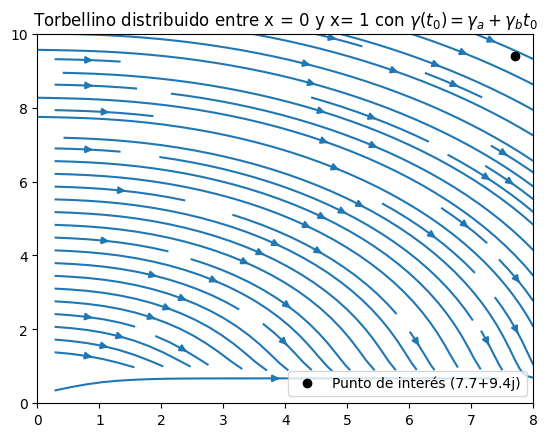

In [13]:
import matplotlib.pyplot as plt
n=50
x=np.linspace(0,8,n)
y=np.linspace(0,10,n)
X,Y=np.meshgrid(x,y)
U,V=np.meshgrid(x,y)

for i in range(n):
    for j in range(n):
        t = complex(X[i][j],Y[j][i])
        U[i][j]=fdot(t,10**2).real
        V[j][i]=-fdot(t,10**2).imag

plt.title('Torbellino distribuido entre x = 0 y x= 1 con '+r'$\gamma (t_0)= \gamma _a + \gamma _b t_0 $')
plt.streamplot(X,Y,U,V)
plt.plot(t1.real,t1.imag,'o',color='black',label='Punto de interés '+str(t1))
plt.legend()
plt.show()

In [18]:
import cmath as c
#Compruebo con la integral analítica
#según symbolab queda aproximadamente:
def fdotsym(t):
    return (1j/(2*c.pi)) * (-gammaA*(c.log(t-1)-c.log(t)) + gammaB*(-t*(c.log(t-1)-c.log(t))-1))
fdsym = fdotsym(t1)
u1sym,v1sym = [fdsym.real,-fdsym.imag]
redon=4
print('Desde la integral analítica:')
print('Vel horizontal de',t1,'es:',u1sym,'m/s')
print('Vel vertical de',t1,'es:',v1sym,'m/s')

difu1 = u1-u1sym
difv1 = v1-v1sym
print('\nDiferencia entre utilizar la integral numérica y la analítica:')
print('-Dif. en u:',difu1)
print('-Dif. en v:',difv1)

Desde la integral analítica:
Vel horizontal de (7.7+9.4j) es: 0.12088895724500041 m/s
Vel vertical de (7.7+9.4j) es: -0.09220211823924893 m/s

Diferencia entre utilizar la integral numérica y la analítica:
-Dif. en u: 6.157088727754001e-11
-Dif. en v: 3.1610339346066496e-11


In [25]:
#Solución según pdf de moodle
x,z = [t1.real,t1.imag]
a1 = np.atan(z/(x-b))-np.atan(z/(x-a))
a2 = 0.5*np.log((x**2 + z**2)/((x-1)**2 + z**2))
u = (1/(2*np.pi))*(a1*gammaA-(a2*z-a1*x)*gammaB)
a3 = a2*x + (a - b) + a1*z
v = (1/(2*np.pi))*(-a2*gammaA - a3*gammaB)
print('Vel horizontal:',u)
print('aproximadamente:',round(u,redon))
print('Vel vertical:',v)
print('aproximadamente:',round(v,redon))

Vel horizontal: 0.12088895724499929
aproximadamente: 0.1209
Vel vertical: -0.09220211823925027
aproximadamente: -0.0922


In [23]:
fdots = []
for i in range(4):
    fdots.append(fdot(t1,10**(5+i)).imag)
    if i>0:
        delta=(fdots[i]-fdots[i-1])
        print('Para 10^('+str(5+i)+'), tenemos delta =',delta)

Para 10^(6), tenemos delta = -2.1058494809045314e-08
Para 10^(7), tenemos delta = -2.10583600557257e-09
Para 10^(8), tenemos delta = -2.1061394295252e-10
